### k-Nearest Neighbors classification

**Statistical Learning** refers to collection of mathematical and computation tools to understand data

**supervised learning** estimates or predicts an output based on one or more inputs.
- **inputs** have many names such as: 
    - predictors, 
    - independent varaiables,
    - features,
    - variables.
- **outputs** have many names such as:
     - response variables
     - dependent variables
     
**Regression problems**: when the output is quantitative (e.g. nbr that measures weight or height)

**Classification problems**: when the response is qualitative (yes or no, red or green)

** K-Nearest Neighbors classifier (KNN)**: Given a positive integer k, say 5, and a new data point, it first identifies those k points in the data that are nearest to the point and classifies the new data point as belonging to the most common class among those k neighbors.

#### Finding the Euclidean distance between two points:
From the mathematical perspective: it will be nicer to use **column vectors**, but we will be using **row vectors**, because they're easier to deal with in NumPy

In [1]:
import numpy as np

def distance(p1, p2):
    """Find the distance between p1 and p2."""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)

4.2426406871192848

#### Majority Vote

Given an arrary or sequence of votes, we determine how many times each elements occurs then return the most commom element

In [2]:
import random

def majority_vote(votes):
    """
    xxx
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    winners =[]
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)

In [3]:
votes =[1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
winner

3

###### mode of a numpy array

the most commonly occurring element in a sequence
is called **mode** in statistics.

**scipy.stats.mstats.mode(a, axis=0)**-> returns an array of the modal (most common) value in the passed array.If there is more than one such value, only the first is returned. The bin-count for the modal bins is also returned
a: array_like

In [4]:
import scipy.stats as ss

def majority_vote_short(votes):
    """
    Return the most common element in votes.
    """
    mode, count = ss.mstats.mode(votes)
    return mode

In [5]:
votes =[1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
majority_vote_short(votes)


array([ 2.])

### Finding Nearest Neighbors

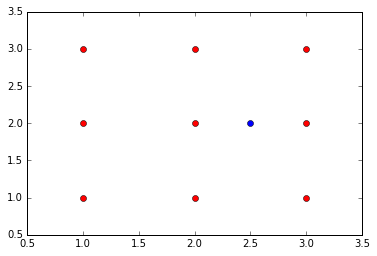

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbors of point p and return their indices."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]
    
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5, 2])

plt.plot(points[:,0],points[:, 1], "ro" )
plt.plot(p[0], p[1],'bo')
plt.axis([0.5, 3.5,0.5,3.5])
plt.show()

In [7]:
ind  = find_nearest_neighbors(p, points, 3); print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [8]:
def knn_predict(p, points,outcomes, k=5):
    """"""
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [9]:
#class 0 and class 1
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [10]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [11]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=2)

0

### Generate synthetic data

objective: write a function that generates synthethic data exactly two end points, where the first end points are from class 0 and the second end points are from class1.

In this case, we'll generate predictors from two
bivariate normal distributions. 

Bivariate means 2 variables, like x and y. If we want to generate x variables, then we'd be dealing with univariate data.

In [12]:
# specify the mean and the standard deviation:
# generate 5 rows and 2 columns
ss.norm(0,1).rvs((5,2))


array([[ 1.10685613,  0.57300161],
       [ 1.2434164 ,  0.25061561],
       [ 0.70197492,  0.23976753],
       [ 0.75779239, -0.19760714],
       [ 0.4386345 ,  1.08908938]])

In [13]:
ss.norm(1,0).rvs((5,2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [14]:
np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis=0)

array([[-1.44663681, -0.79663211],
       [ 0.37994311, -0.02986218],
       [-0.64904956, -0.5021035 ],
       [ 1.3510902 ,  0.17480617],
       [ 1.35335537, -0.37775512],
       [ 2.91313569,  2.4786674 ],
       [ 0.84881693,  1.87368932],
       [ 0.5996151 ,  0.74068669],
       [ 1.60149425,  1.26247567],
       [ 0.7426975 ,  4.08308131]])

In [15]:

def generate_synth_data(n):
    """Create 2 sets of points from bivariate normal distributions."""
    points = np.concatenate((ss.norm(0, 1).rvs((n,2)), ss.norm(1, 1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)



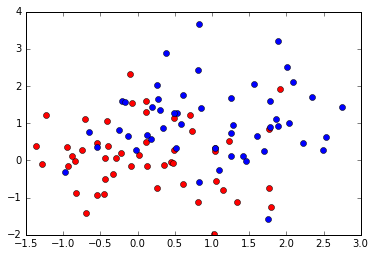

In [16]:
n = 50
points, outcomes = generate_synth_data(n)

plt.figure()
plt.plot(points[:n, 0], points[:n, 1], 'ro')
plt.plot(points[n:, 0], points[n:, 1], 'bo')
plt.savefig("bivardata.png")


**meshgrid:**
Meshgrid takes in two or more coordinate vectors,
say one vector containing the x values of interest and the other containing the y values of interest. It returns matrices, the first containing the x values for each grid point and the second containing the y values for each grid point.

**enumerate: **
Enumerate is useful when dealing with sequences
and when we'd like to have access simultaneously
to two things-- different elements in the sequence as well as their index
values.

In [17]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid"""
    x_min, x_max, y_min, y_max = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j, i] = knn_predict(predictors, p, outcomes, k)
    
    return xx, yy, prediction_grid

In [18]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [ ]:
predictors, outcomes = generate_synth_data(n)
k = 5; filename = "knn_synth_5.pdf"; limits = (-3, 4, -3, 4); h = 0.1


xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)

plot_prediction_grid(xx, yy, prediction_grid, filename)

In [ ]:

k = 50; filename = "knn_synth_50.pdf"; limits = (-3, 4, -3, 4); h = 0.1
predictors, outcomes = generate_synth_data(n)

xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)

plot_prediction_grid(xx, yy, prediction_grid, filename)

## SciKitLearn
we're goint to use a classic data set iris that consists of 150 different iris flowers. 50 from each of three different species.
each flower have : Sepal length, Sepal width, petal length, and petal width

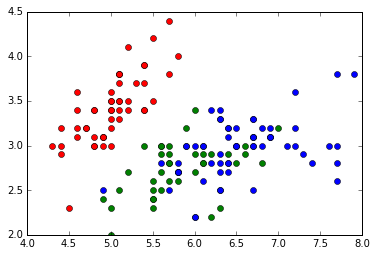

In [19]:
from sklearn import datasets
iris = datasets.load_iris()

predictors = iris.data[:, :2]
outcomes = iris.target

plt.plot(predictors[outcomes==0][:, 0], predictors[outcomes==0][:, 1], 'ro')
plt.plot(predictors[outcomes==1][:, 0], predictors[outcomes==1][:, 1], 'go')
plt.plot(predictors[outcomes==2][:, 0], predictors[outcomes==2][:, 1], 'bo')

In [ ]:

k = 5; filename = "iris_grid.pdf"; limits = (4,8,1.5,4.5); h = 0.1
xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions  = knn.predict(predictors)

In [21]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [22]:
print(100*np.mean(sk_predictions == my_predictions))
print(100*np.mean(sk_predictions == outcomes))
print(100*np.mean(my_predictions == outcomes))

96.0
83.3333333333
84.6666666667
